In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud

In [2]:
rajf_reply = pd.read_csv("rajf_reply.csv")

In [3]:
rajf_timeline = pd.read_csv("rajf_timeline.csv")

In [5]:
rajf_timeline

,Unnamed: 0,full_text,lang,retweet_count,source,favourites_count,followers_count,friends_count,statuses_count
0,RaiffeisenCZ,@josefhrib Rádi jsme Vám pomohli alespoň takto...,cs,0,"<a href=""https://www.zoomsphere.com"" rel=""nofo...",245,2674,298,3699
1,RaiffeisenCZ,"@OK1XPM Dobrý den, děkujeme za reakci. Rodné č...",cs,0,"<a href=""https://www.zoomsphere.com"" rel=""nofo...",245,2674,298,3699
2,RaiffeisenCZ,"@josefhrib Josefe, my Vám nedokážeme v tuto ch...",cs,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",245,2674,298,3699
3,RaiffeisenCZ,@jansladek38 Kompletně zdarma jsou u nových ty...,cs,0,"<a href=""https://www.zoomsphere.com"" rel=""nofo...",245,2674,298,3699
4,RaiffeisenCZ,"@mcumpl Dobrý den, aktivace RB klíče za pomoci...",cs,0,"<a href=""https://www.zoomsphere.com"" rel=""nofo...",245,2674,298,3699
...,...,...,...,...,...,...,...,...,...
4795,RaiffeisenCZ,@luisosw we plan to run Apple Pay already this...,en,0,"<a href=""https://www.zoomsphere.com/"" rel=""nof...",245,2674,298,3699
4796,RaiffeisenCZ,@fundix2 Apple Pay plánujeme spustit v tomto r...,cs,0,"<a href=""https://www.zoomsphere.com/"" rel=""nof...",245,2674,298,3699
4797,RaiffeisenCZ,@milosbajer Apple Pay plánujeme spustit v druh...,cs,0,"<a href=""https://www.zoomsphere.com/"" rel=""nof...",245,2674,298,3699
4798,RaiffeisenCZ,"@luisosw @blahutpavel Be sure, that we are alr...",en,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",245,2674,298,3699


In [4]:
rajf_reply

,Unnamed: 0,screen_name,followers_count,friends_count,statuses_count,favourites_count,created_at,full_text,retweet_count,favorite_count
0,RaiffeisenCZ,josefhrib,15.0,81.0,206.0,12.0,Fri Feb 12 08:11:27 +0000 2021,@RaiffeisenCZ Alespoň děkuji za odkaz na produ...,0.0,0.0
1,RaiffeisenCZ,OK1XPM,132.0,346.0,35828.0,81536.0,Thu Feb 11 13:34:03 +0000 2021,@RaiffeisenCZ Nikdy by mě nebapadlo že se takt...,0.0,0.0
2,RaiffeisenCZ,josefhrib,15.0,81.0,206.0,12.0,Wed Feb 10 23:40:35 +0000 2021,@RaiffeisenCZ Jde mi hlavně o mé dlouhodobé in...,0.0,0.0
3,RaiffeisenCZ,jansladek38,17.0,49.0,3312.0,2435.0,Thu Feb 11 21:37:25 +0000 2021,@RaiffeisenCZ Zapomněli jste dodat že výběr z ...,0.0,0.0
4,RaiffeisenCZ,mcumpl,262.0,698.0,4993.0,3950.0,Thu Feb 11 22:29:02 +0000 2021,"@RaiffeisenCZ Jasne, takze se budu muset znovu...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1195,RaiffeisenCZ,luisosw,55.0,64.0,986.0,103.0,Tue Feb 19 06:43:21 +0000 2019,Apple Pay starts today in czech modern banks. ...,0.0,0.0
1196,RaiffeisenCZ,fundix2,142.0,203.0,6223.0,3445.0,Tue Feb 19 06:12:38 +0000 2019,"@RaiffeisenCZ Dobrý den, nejde mě přidat karta...",0.0,1.0
1197,RaiffeisenCZ,milosbajer,126.0,400.0,11195.0,14142.0,Tue Feb 19 05:53:17 +0000 2019,Chtěl jsem si do #ApplePay přidat k soukromé k...,0.0,7.0
1198,RaiffeisenCZ,luisosw,55.0,64.0,986.0,103.0,Sun Feb 17 02:17:48 +0000 2019,"@blahutpavel @RaiffeisenCZ Working on it, ok. ...",0.0,0.0


In [15]:
rajf_reply['card_mentioned'] = (
    rajf_reply['full_text'].str.find('kart', start=0, end=None) + 1 +
    rajf_reply['full_text'].str.find('karet', start=0, end=None)+ 1 +
    rajf_reply['full_text'].str.find('card', start=0, end=None) +1
)


In [17]:
rajf_reply['mortgage_mentioned'] = (
    rajf_reply['full_text'].str.find('mortgage', start=0, end=None) + 1 +
    rajf_reply['full_text'].str.find('hypot', start=0, end=None)+ 1 +
    rajf_reply['full_text'].str.find('bydlen', start=0, end=None) +1
)


In [20]:
rajf_reply['banking_mentioned'] = (
    rajf_reply['full_text'].str.find('banking', start=0, end=None) + 1 +
    rajf_reply['full_text'].str.find('bankovnic', start=0, end=None)+ 1 +
    rajf_reply['full_text'].str.find('IB', start=0, end=None)+ 1 +
    rajf_reply['full_text'].str.find('george', start=0, end=None) +1
)


In [ ]:
rajf_reply['mortgage_mentioned'] = rajf_reply['full_text'].str.find('kart', start=0, end=None)
rajf_reply['card_mentioned'] = rajf_reply['full_text'].str.find('kart', start=0, end=None)
rajf_reply['card_mentioned'] = rajf_reply['full_text'].str.find('kart', start=0, end=None)
rajf_reply['card_mentioned'] = rajf_reply['full_text'].str.find('kart', start=0, end=None)
rajf_reply['card_mentioned'] = rajf_reply['full_text'].str.find('kart', start=0, end=None)


In [11]:
pd.set_option('display.max_colwidth', None)

In [22]:
rajf_reply.dtypes

Unnamed: 0             object
screen_name            object
followers_count       float64
friends_count         float64
statuses_count        float64
favourites_count      float64
created_at             object
full_text              object
retweet_count         float64
favorite_count        float64
card_mentioned        float64
mortgage_mentioned    float64
banking_mentioned     float64
dtype: object

In [23]:
import datetime


In [33]:
tz_identifier = datetime.timezone(offset = datetime.timedelta(0))

In [25]:
twitter_datetime_format = "%a %b %d %X %z %Y"

In [26]:
rajf_reply['created_at_datetime'] = (
pd.to_datetime(rajf_reply['created_at'], format=twitter_datetime_format, errors='coerce')
)

In [34]:
rajf_reply['created_at_datetime'] >= datetime.datetime(2021,2,5,0,0,0, tzinfo = tz_identifier)

0        True
1        True
2        True
3        True
4        True
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Name: created_at_datetime, Length: 1200, dtype: bool

In [35]:
rajf_reply['created_at_datetime'].min()

Timestamp('2019-02-17 02:17:48+0000', tz='UTC')

In [21]:
rajf_reply[rajf_reply['banking_mentioned'] >= 1]

,Unnamed: 0,screen_name,followers_count,friends_count,statuses_count,favourites_count,created_at,full_text,retweet_count,favorite_count,card_mentioned,mortgage_mentioned,banking_mentioned
43,RaiffeisenCZ,meme12555,354.0,1136.0,17666.0,11377.0,Sat Feb 06 19:09:16 +0000 2021,"@RaiffeisenCZ @michalblaha @pavelkout @Fio_banka @equabankcz Zas dokonalí ale taky nejste, ten rozjezd nového bankovnictví, co dodnes neumí spoustu věcí, co to původní po e-bance... abyste si zas nemysleli. 🤷‍♂️🙃 A takový spořící účet by s obálkami na třídění bych ocenil...",0.0,2.0,0.0,0.0,111.0
58,RaiffeisenCZ,josefslerka,39959.0,2074.0,44535.0,22852.0,Tue Feb 02 09:32:53 +0000 2021,"@raiffeisencz nemate, prosim, nejake problem s mobilnim bankovnictvi, prodlevy mezi jednotlivymi kroky pri platbe jsou neumerne dlouhe",0.0,0.0,0.0,0.0,57.0
69,RaiffeisenCZ,hnevkop,114.0,509.0,412.0,38.0,Tue Jan 26 12:15:43 +0000 2021,"@RaiffeisenCZ mobilni bankovnictvi, prikaz k platbe na iOS 14.3 vam nejak hapruje... spis nefunguje. nejde vytvorit. Js\nem sam ?",0.0,0.0,0.0,0.0,23.0
70,RaiffeisenCZ,hnevkop,114.0,509.0,412.0,38.0,Tue Jan 26 12:15:43 +0000 2021,"@RaiffeisenCZ mobilni bankovnictvi, prikaz k platbe na iOS 14.3 vam nejak hapruje... spis nefunguje. nejde vytvorit. Js\nem sam ?",0.0,0.0,0.0,0.0,23.0
73,RaiffeisenCZ,znouza,305.0,222.0,8717.0,16741.0,Fri Jan 22 10:40:16 +0000 2021,@RaiffeisenCZ \n- proc stale neni mozne zalozit/zmenit inkaso pres MB\n- proc v MB nenajdu svoje klientske cislo? Ktere tak nesmyslne a vytrvale chcete k prihlaseni pres IB,0.0,0.0,0.0,0.0,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,RaiffeisenCZ,ra_dol,186.0,385.0,2346.0,280.0,Wed May 15 08:48:22 +0000 2019,On-line bankovnictví @RaiffeisenCZ není už druhý den dostupné. Čas udělát pápá,0.0,0.0,0.0,0.0,9.0
1071,RaiffeisenCZ,takNevim1,15.0,76.0,910.0,1064.0,Mon Apr 15 17:08:06 +0000 2019,"@RaiffeisenCZ nejde internetbanking.\n\nJežkovy voči, snad je ty kachny neukojily k smrti 😱",0.0,0.0,0.0,0.0,29.0
1079,RaiffeisenCZ,milosbajer,126.0,400.0,11195.0,14142.0,Fri Apr 05 12:38:49 +0000 2019,"@RaiffeisenCZ - nové bankovnictví mi v iOS aplikaci v transakční historii uvádí Výběr hotovosti Westbahnstr.18, Endsaldo - co přesně si pod tím mám představit?",0.0,0.0,0.0,0.0,23.0
1101,RaiffeisenCZ,KocourA,18.0,36.0,153.0,15.0,Thu Mar 14 20:56:59 +0000 2019,"@RaiffeisenCZ Hezké, ale s ohledem na kvalitu vaší Android aplikace a web IB bych raději Google Pay. To budete tedy podporovat kdy?",0.0,0.0,0.0,0.0,75.0


In [19]:
rajf_reply[rajf_reply['mortgage_mentioned'] >= 1]

,Unnamed: 0,screen_name,followers_count,friends_count,statuses_count,favourites_count,created_at,full_text,retweet_count,favorite_count,card_mentioned,mortgage_mentioned
21,RaiffeisenCZ,djlwq,434.0,1830.0,34796.0,951.0,Wed Feb 10 11:06:08 +0000 2021,"Predstavte si, ze mate tri dilci hypoteky od @RaiffeisenCZ … vsechny splatite ve stejnou chvilku… Kolik Vam prijde potvrzeni o splaceni? 3ks - OK, ale proc ve trech zasilkach @Ceska_posta_sp ve trech ruznych dnech? :-O",0.0,0.0,0.0,34.0
67,RaiffeisenCZ,djlwq,434.0,1830.0,34796.0,951.0,Wed Jan 27 13:14:25 +0000 2021,"@RaiffeisenCZ Dobry den preji, hypoteky u Vas sem splatil a Vas ucet je nyni naprosto zbytecny, stejne ho uz sest let nepouzivam. Ptam se na zruseni, ne reseni situace, je to mozne bez osobni navstevy? Dekuji.",0.0,1.0,0.0,32.0
75,RaiffeisenCZ,michalminarovic,1073.0,963.0,7082.0,3989.0,Thu Jan 21 21:12:21 +0000 2021,"@RaiffeisenCZ Dobrý den, mohu se zeptat, kdy standardně zasíláte potvrzení o úrocích z hypotéky? Nebo příp. bude možné si to stáhnout z Internetového bankovnictví? Díky",0.0,0.0,0.0,88.0
311,RaiffeisenCZ,Jurasek_Petr,42.0,71.0,5378.0,1842.0,Thu Sep 10 12:26:45 +0000 2020,"@RaiffeisenCZ co to zaměstnavate za šmejda, co pohrda obyčejnými lidmi? Takový namyšlený mamrd @JosefLangmayer u vás může dělat ředitele, že pohrda svými klienty? Jsme celá vaše rodina vašimi klienty několik let, i jsme u vás měli žádost o hypotéku ale když námi pohrdate, smůla https://t.co/bCLnuviRZ2",0.0,1.0,0.0,241.0
598,RaiffeisenCZ,AndrejLobotka,1864.0,213.0,4216.0,1722.0,Mon Mar 30 11:22:58 +0000 2020,"Ale možná jsem jen špatně hledal a @komercka, @CSOB_CZ, @UniCredit_CZSK, @Air_Bank, @sberbank_cz, @RaiffeisenCZ, @Fio_banka, @Ceskasporitelna, @hypotecka, @bankacreditas, @MONETAMoney, @mbank_cz, @ingbankcz a @equabankcz mně na dané informace odkážou.",0.0,0.0,0.0,145.0
641,RaiffeisenCZ,pavel29172753,0.0,13.0,2.0,2.0,Sat Mar 14 21:25:28 +0000 2020,"@RaiffeisenCZ dobry den, uvazuje RB take o odlozeni splatek hypoteky jako nektere ostatni banky?",0.0,0.0,0.0,61.0
683,RaiffeisenCZ,vojtakrejcir,265.0,617.0,7499.0,25030.0,Mon Feb 17 09:06:11 +0000 2020,"@RaiffeisenCZ se sice chlubí okamžitými platbami, ale splátku hypotéky odeslanou v pátek z účtu v RB připíše na účet v RB v pondělí. To jako vážně???",0.0,0.0,0.0,63.0
1048,RaiffeisenCZ,TheChristsize,157.0,402.0,18074.0,4922.0,Thu May 02 11:46:33 +0000 2019,"@RaiffeisenCZ když mám na svoji žádost zrušené nabídky na půjčky, kreditky hypotéky apod, je normální že mi ve Vaši aplikaci vyskočí na celou obrazovku nabídka na půjčku? Mi to normální nepřijde",0.0,0.0,0.0,76.0
1072,RaiffeisenCZ,JirkaV,441.0,642.0,10488.0,3393.0,Mon Apr 15 13:18:35 +0000 2019,"@RaiffeisenCZ Diky, ale stavim se prilezitostne na pobocce, chodim okolo. Chtel jsem jen, abyste mi prestali posilat dopisy s nabidkou hypoteky a obtezujici SMS s nabidkou pujcek. Oboji jsem odhlasoval uz v minulosti :(",0.0,0.0,0.0,136.0
1113,RaiffeisenCZ,jindrichsaur,84.0,79.0,1512.0,1261.0,Sun Mar 10 10:22:31 +0000 2019,"@littlelucy_lu Počítá se jako změna, když mám účty u čtyř bank a s #ApplePay jsem jako hlavní banku začal použivat jinou? Nechal jsem si vystavit karty u @mbank_cz a @Air_Bank. Ve @Fio_banka mám trvalé platby. A v @RaiffeisenCZ už mi zbyly jenom hypotéky.",0.0,2.0,147.0,247.0


In [16]:
rajf_reply[rajf_reply['card_mentioned'] >= 0]

,Unnamed: 0,screen_name,followers_count,friends_count,statuses_count,favourites_count,created_at,full_text,retweet_count,favorite_count,card_mentioned
0,RaiffeisenCZ,josefhrib,15.0,81.0,206.0,12.0,Fri Feb 12 08:11:27 +0000 2021,"@RaiffeisenCZ Alespoň děkuji za odkaz na produktovou nabídku podívám se. Tak snad se brzo transakce Raifky-Equa dořeší a budete informovat klienty kteří mají u Equa investice, jak se to s nimi bude mít.",0.0,0.0,0.0
1,RaiffeisenCZ,OK1XPM,132.0,346.0,35828.0,81536.0,Thu Feb 11 13:34:03 +0000 2021,@RaiffeisenCZ Nikdy by mě nebapadlo že se takto nebezpečně může chovat banka...,0.0,0.0,0.0
2,RaiffeisenCZ,josefhrib,15.0,81.0,206.0,12.0,Wed Feb 10 23:40:35 +0000 2021,"@RaiffeisenCZ Jde mi hlavně o mé dlouhodobé investice, které jsem do této doby posílal kromě jiných platforem také do equabank. Nejde mi o samotný rok 2021 ale o ix následujících jednotek až desítku let. Proto jsem se ptal. Jestli nebude tedy lépe již začít raději dávat peníze rovnou jinam.",0.0,0.0,0.0
3,RaiffeisenCZ,jansladek38,17.0,49.0,3312.0,2435.0,Thu Feb 11 21:37:25 +0000 2021,@RaiffeisenCZ Zapomněli jste dodat že výběr z bankomatů zdarma je jen bezkontaktne jinak si uctujete poplatek,0.0,0.0,0.0
4,RaiffeisenCZ,mcumpl,262.0,698.0,4993.0,3950.0,Thu Feb 11 22:29:02 +0000 2021,"@RaiffeisenCZ Jasne, takze se budu muset znovu prihlasit SMS klicem a zaplatim dalsich 19 Kc. Aspon ze naposledy.",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1194,RaiffeisenCZ,criq,364.0,581.0,1428.0,396.0,Tue Feb 19 06:52:22 +0000 2019,"@RaiffeisenCZ Dobrý den, ode dneška funguje v Česku Apple Pay, ale bohužel mi nejde přidat moje karta od RB. Kdy začne fungovat?",0.0,0.0,97.0
1195,RaiffeisenCZ,luisosw,55.0,64.0,986.0,103.0,Tue Feb 19 06:43:21 +0000 2019,Apple Pay starts today in czech modern banks. @RaiffeisenCZ still figuring out what smartphones are.\nNothing that we didn’t know though. Waiting for them to join the xth wave. Škoda :( https://t.co/qdi3c6XzEh,0.0,0.0,0.0
1196,RaiffeisenCZ,fundix2,142.0,203.0,6223.0,3445.0,Tue Feb 19 06:12:38 +0000 2019,"@RaiffeisenCZ Dobrý den, nejde mě přidat karta do Apple Wallet, jak mám postupovat?",0.0,1.0,42.0
1197,RaiffeisenCZ,milosbajer,126.0,400.0,11195.0,14142.0,Tue Feb 19 05:53:17 +0000 2019,"Chtěl jsem si do #ApplePay přidat k soukromé kartě i firemní, ale bohužel moji hlavní banku @RaiffeisenCZ inspirují jiní klienti než já. Asi je čas oprášit firemní účet v @komercka...",0.0,7.0,46.0


# Largest 5 Czech banks twitter overview

In [36]:
sporka_timeline = pd.read_csv("sporka_timeline.csv")

In [53]:
all_pd = pd.concat([rajf_timeline, sporka_timeline]).reset_index().drop("index", axis = 1).rename({"Unnamed: 0":"bank_name"}, axis = 1)

In [88]:
all_pd = pd.concat([all_pd, pd.get_dummies(all_pd['lang'])], axis = 1)

In [79]:
cs_lang = all_pd[all_pd["lang"] == 'cs'] 

In [94]:
!pip install plotnine

In [92]:

fig = plt.figure()
plt.title('language of tweets ')
ax = fig.add_axes([0,0,1,1])
groups = all_pd["bank_name"]

cs_lang = all_pd["cs"].sum()
en_lang = all_pd["en"].sum()

plt.bar(groups, cs_lang, color = 'b')
plt.bar(groups, en_lang, color = 'r', bottom = cs_lang)

plt.show()

KeyboardInterrupt: 

In [60]:
all_pd[["bank_name", "favourites_count", "followers_count", "friends_count", "statuses_count"]].groupby('bank_name').max()

,favourites_count,followers_count,friends_count,statuses_count
bank_name,,,,
Ceskasporitelna,2481,4560,1399,6086
RaiffeisenCZ,245,2674,298,3699


In [64]:
import matplotlib.pyplot as plt

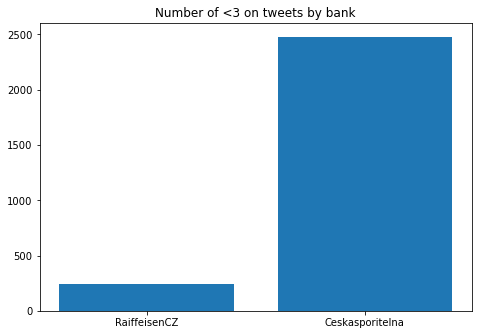

In [96]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Number of <3 on tweets by bank')
groups = all_pd["bank_name"]
favourites_count = all_pd["favourites_count"]
ax.bar(groups,favourites_count)
plt.show()

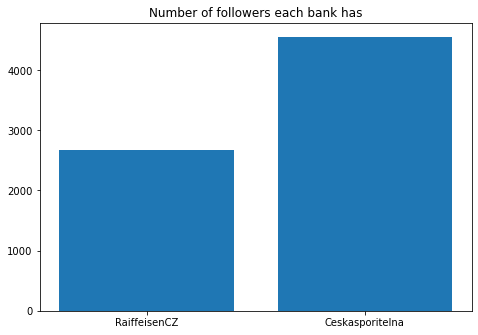

In [95]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Number of followers each bank has')
groups = all_pd["bank_name"]
favourites_count = all_pd["followers_count"]
ax.bar(groups,favourites_count)
plt.show()

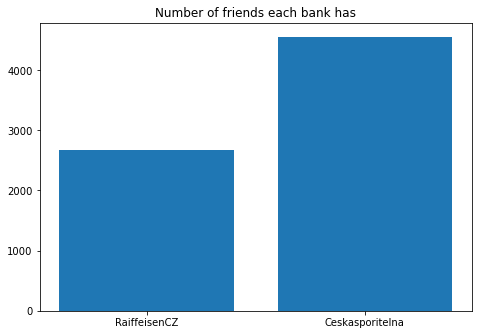

In [74]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
groups = all_pd["bank_name"]
favourites_count = all_pd["followers_count"]
ax.set_title('Number of friends each bank has')
ax.bar(groups,favourites_count)
plt.show()

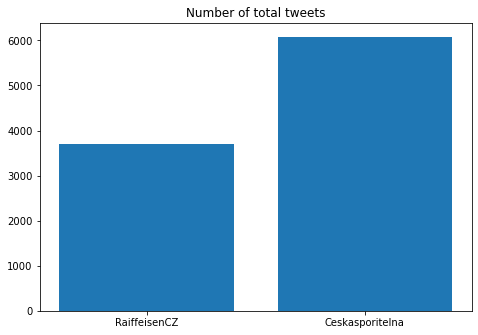

In [72]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Number of total tweets')
groups = all_pd["bank_name"]
favourites_count = all_pd["statuses_count"]
ax.bar(groups,favourites_count)
plt.show()
